# Práctica 1


## Gráficas

importación de las librerias utilizadas

In [41]:
import pandas as pd # Lectura de los datos
import matplotlib.pyplot as plt # Graficacion
import seaborn as sb # Histograma
plt.style.use('ggplot') # Estilo de gráfica
%matplotlib inline

Lectura de datos

In [42]:
# Librerio pandas para leer el archivo csv
data = pd.read_csv('Practica de Seguridad Radioloogica.csv')

### Análisis estadístico de datos

In [50]:
# Este comando sirve para visualizar los primeros 5 datos de cualquier dataset
data.head()

,Serial number:,Unnamed: 1,Unnamed: 2,Lectura,Cuentas,Unnamed: 5,Lectura.1,Cuentas.1
0,Tubo GM:,NaN,NaN,NaN,NaN,NaN,1,323
1,Vop=820 v,NaN,NaN,NaN,NaN,NaN,2,324
2,NaN,NaN,NaN,NaN,NaN,NaN,3,302
3,NaN,NaN,NaN,NaN,NaN,NaN,4,331
4,NaN,NaN,NaN,NaN,NaN,NaN,5,287


In [44]:
# Seleccionamos solo las columnas que nos interesan
data_graf = data[['Lectura.1','Cuentas.1']]
data_graf.head()

,Lectura.1,Cuentas.1
0,1,323
1,2,324
2,3,302
3,4,331
4,5,287


# Histograma

Para el histograma debes escoger el numero de clases a graficar, suelo usar la regla de Sturges $$k = 1+3.3221\log(N)$$ Donde $k$ es el número de clases (barras) y $N$ es el número de datos. En estes caso particular

$$k = 1+3.3221\log(220) = 8.7 \approx 9$$ 

con esto puedes sacar el ancho de clase $$h = \frac{Rango}{k}$$ Asi ya puedes definir cuantos datos van a ir agrupados en cada "barra", siempre se redondea al entero más cercano. En este caso $$h = \frac{220}{9} = 24.4 \approx 24$$

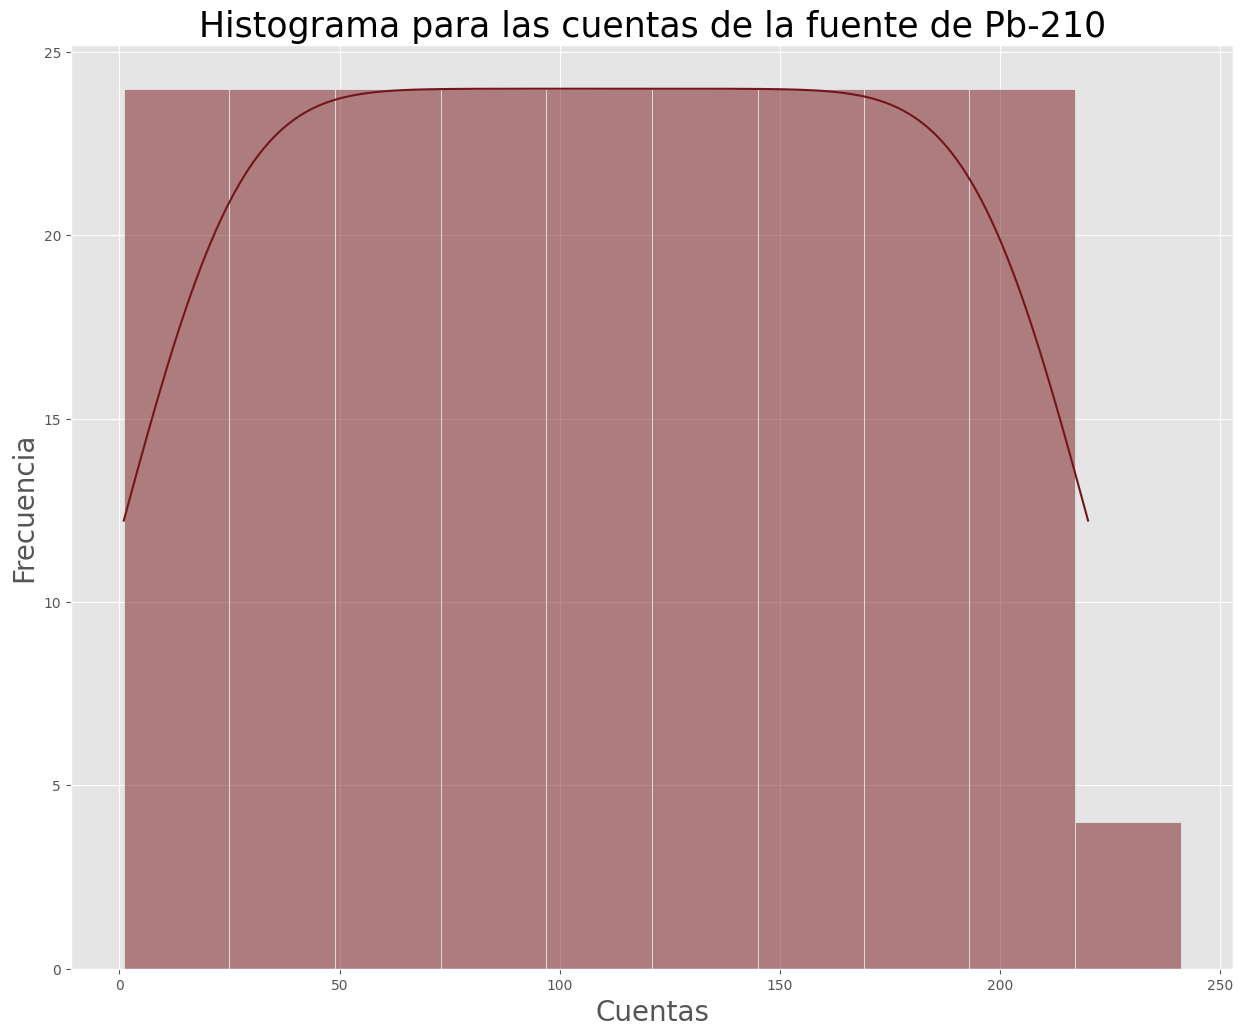

In [54]:
# Selecciona la columan de cuentas
cuentas = data_graf['Lectura.1']
# Matplotlib se puede usar para crear la 'fig' como el lienzo donde graficar y el 'axes' que seria las (o las graficas) 
# De esta manera determinamos el tamaño de la imagen (figura) con el parámetro figsize 
fig, ax = plt.subplots(figsize=(15, 12))
# Ahora modificamos las propiedades de la grafica accediento a los metodos de el axes, el cual llame ax
# Con set_title ingresas el nombre de la gráfica y se puede modificar el tamaño, el color, etc
ax.set_title('Histograma para las cuentas de la fuente de Pb-210',fontsize=25)
# set_xlabel y set_ylabel sriven para dar el nombre a los ejes, tambien se puede modificar el tamaño de letra, color, etc
ax.set_xlabel('Cuentas',fontsize=20)
ax.set_ylabel('Frecuencia',fontsize=20)
# Aqui se manda a llamar a la libreria seaborn (sb) ya que cuenta con un metodo para graficar histogramas, 
# en este caso como parametro tiene 'cuentas' que son los datos, 'color' con el dato en codigo hex, 'binwidth' que es precisamente el ancho de clase 'h' que calcule arriba, 'ax' le dices que quieres que la graficas la 
# ponga en el axes que hiciste
sb.histplot(cuentas, color='#741519',binwidth=24,  kde=True, ax = ax,legend = True) #creamos el gráfico en Seaborn
plt.show()

0        1
1        2
2        3
3        4
4        5
      ... 
245    246
246    247
247    248
248    249
249    250
Name: Lectura.1, Length: 250, dtype: int64


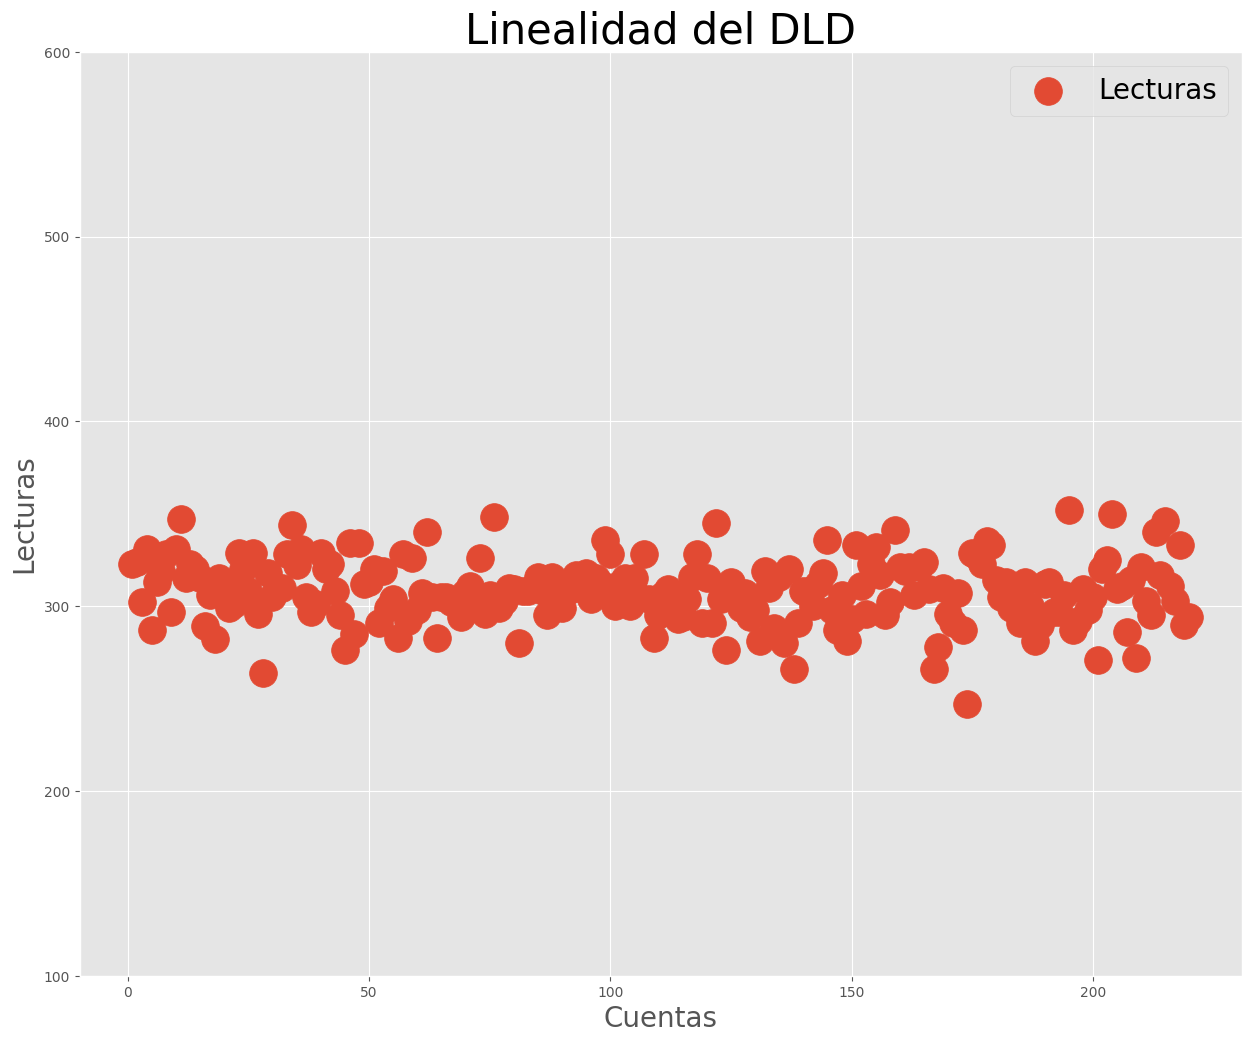

In [ ]:
plt.figure(figsize=(15, 12))
#promedio
X = data_graf['Lectura.1']
Y = data_graf.iloc[:,[1]]
print(X)
plt.scatter(X,Y, s = 400,label='Lecturas')
plt.legend(fontsize=20)
plt.xlabel('Cuentas',fontsize=20)
plt.ylabel('Lecturas',fontsize=20)
plt.title('Cuentas',fontsize=30)
plt.ylim(100,600)
plt.show()